A regressão é comumente utilizada como sendo base para outros modelos.

Durante o estudo de regressão, queremos verificar se duas ou mais variáveis estão relacionadas de alguma forma e como elas relacionam (como ela interfere na outra variável). Caso façamos isso entre duas variáveis, falamos da **Regressão Linear Simples** e, caso tenhamos um grupo de variáveis (2 ou +) afetando uma variável, falamos da **Regressão Linear Múltipla**.

Um exemplo disso poderia ser o aumento do desmatamento dado uma temperatura (uma temperatura mais alta pode ter relação com o aumento do número de queimadas). Ou seja, uma variável "queimada" **depende** de uma variável "temperatura" **independente**.

No exemplo acima as variáveis se c**orrelacionam de forma positiv**a (queimadas aumentam em temperaturas mais altas). Caso ela fosse **negativa**, as queimadas diminuiriam em temperaturas mais altas.<br>
Vale lembrar que também há o caso de **não haver correlação**, neste caso, a temperatura não influenciaria no aumento do número de queimadas.

OBS: **Correlação não implica causalidade**.<br>No exemplo dado, para ter certeza da causalidade, precisaríamos fazer uma análise mais profunda, como por exemplo, verificar a região onde aconteceram as queimadas, o grau em que ocorreram, a vegetação, a umidade do ar, chuvas etc. O que poderíamos falar é que dado uma relação matemática, o aumento da temperatura **provavelmente** iria aumentar o número de queimadas, mas não podemos **afirmar**.

Outros exemplo de regressão são:
- Regressão Linear
- Regressão Polinomial
- Regressão Logística
- Regressão Quantílica
- Regressão Ridge
- Regressão Lasso
- Regressão ElasticNet
- Regressão de Componentes Principais
- Regressão por Mínimos Quadrados Parciais
- Regressão Vetorial de Suporte
- Regressão Ordinal
- Regressão de Poisson
- Regressão Binomail Negativa
- Regressão Quasi-Poisson
- Regressão de Cox

---
**Regressão Linear simples**:

<img src="https://www.alura.com.br/artigos/assets/desvendando-a-regressao-linear/imagem4.png"><br>
Onde:
- B0 e B1 são coeficientes aprendidos durante o treinamento do modelo
- y = valor a se prever (variável dependente)
- x = input (variável independente)
- E = erros

Para o caso da equação y^ = a + bx,
- 'a' é o termo de viés (bias), por ex, o tamanho de um pão francês antes de ser colocado no forno para ser assado.
- 'b' é a inclinação da reta da variável (peso atribuído à variavel independente).
- Ou seja, 'a' e 'b' são os coeficientes.

**Regressão Linear Múltipla**:

<img src="https://cdn1.gnarususercontent.com.br/1/547588/9dacadd2-9b05-4463-8332-c7371b54f88e.png"><br>
Onde as variáveis seguem a lógica da "simples" mas com "vários X's e Beta's associados".

Fazendo uma Regressão Linear Simples de forma prática em Python:

- Prevendo a altura dada uma idade (em meses)

`y^ = a + bx`

In [17]:
# Criando os dados

import pandas as pd

data = { 'student'    : ['João', 'Ribeiro', 'Evaldo', 'Isaias', 'Jessyca','Anne','Luiz'],    
         'age_months' : [0, 20, 25, 50, 75, 90, 100],    
         'height_cm'  : [20, 60, 70, 120, 170, 200, 220 ] }

df_age_vs_height = pd.DataFrame(data)
df_age_vs_height

,student,age_months,height_cm
0,João,0,20
1,Ribeiro,20,60
2,Evaldo,25,70
3,Isaias,50,120
4,Jessyca,75,170
5,Anne,90,200
6,Luiz,100,220


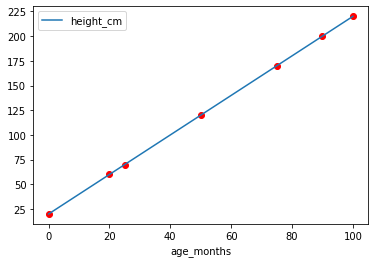

In [18]:
import matplotlib.pyplot as plt

df_age_vs_height.plot(x = 'age_months', y = 'height_cm')
plt.scatter(x = 'age_months', y = 'height_cm', data = df_age_vs_height, color = 'red')

Em uma abordagem manual:

`y^ = a + bx`

Cálculo para a primeira pessoa:
- 20 = a + b*(0)
- a = 20

Cálculo para a segunda pessoa:
- 60 = a + b*(20)
- 60 = 20 + 20b
- b = 2

Ou seja, a inclinação da reta é de 2 e 'a' vale 20.

Caso não tivessemos o parâmetro x = 0 no primeiro caso, começaríamos com valores aleatórios de 'a' e 'b' (inicialização dos parâmetros).

Este foi um exemplo de dados perfeitos, sem uma taxa de erros. No mundo real, precisaríamos trabalhar com esta taxa, para que o modelo possa aprender.

---

Treinaremos o algoritmo para que ele busque o melhor valor de 'a' e 'b' (combinados) onde existam dados com uma certa taxa de erro.

Utilizando a técnica dos **mínimos quadrados**:

<img src="https://miro.medium.com/max/500/0*gglavDlTUWKn4Loe">

Ou seja, calculamos a diferença entre os valores preditos e o valor real (da função), e a diferença será o resíduo (taxa de erro).

Calcularemos então todas essas diferenças, a fim de encontrar a minimização dessas diferenças(minimização da soma geral (dos vários pontos de dados) do erro ao quadrado).

O fato de elevarmos ao quadrado se dá para que os erros negativos não compensem os erros positivos (ou vice e versa). Fazendo isso, o erro quadrático geral nos mostrará tanto os erros positivos quanto os negativos, não mascarando ninguém.

Ou seja, com este método, buscamos os parâmetros 'a' e 'b' que combinados **minimizem esses erros**.

---
Para sabermos quão bem esta reta se aproxima da realidade, podemos aplicar, por exemplo, o **Erro padrão da estimativa (S)** ou **Coeficiente de determinação**.

O **erro padrão da estimativa**, representa a distância média dos valores para a linha de regressã, mostrando o "quão errado" o modelo está (em média), medindo a **precisão das previsões do modelo**.

Essa medida é utilizada também, junta da medida R Squared (coeficiente de determinação)

- Quanto **menor** o erro padrão da estimativa, melhor.
- Quanto **maior** o coeficiente de determinação (de 0 a 100%), melhor.

> "What Is R-Squared? R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model". It variates from 0 to 100%.

**Coeficiente de determinação**:
É a proporção da variação total de uma variável independente y que é explicada pela variável independente X. Ele indica o quanto a reta de regressão explica o ajuste da reta (quão bem ela se ajusta aos dados). Ou seja, quão bem a variação da variável dependente pode ser explicada pela variação da variável independente. Como no exemplo do notebook, quão bem o aumento do número de queimadas pode ser explicado pelo aumento da temperatura.

**Coeficiente de correlação**:
Obtido através do coeficiente de determinação, podendo admitir valores entre -1 (relacionamento perfeito negativo) e 1 (relacionamento perfeito positivo).<br>Ele explica a força de relação entre as variáveis.
Obs: Valores próximos de 0 indicam que não há correlação ou correlação fraca.

---
Mensurando o poder explicativo de um modelo de regressão:

- Soma Total dos Quadrados (STQ ou SST) – Nos mostra a variação em y em torno da própria média.

- Soma dos Quadrados de Regressão (SQR) – Nos oferece a variação de y considerando as variáveis X utilizadas no modelo.

- Soma dos Quadrados dos Resíduos (SQU ou SSE) –  Variação de y que não é explicada pelo modelo elaborado.

- STQ = SQR + SQU  

<img src="https://ashutoshtripathicom.files.wordpress.com/2019/01/rsquarecanva2.png">

**Aplicação prática com Python**

   age_months  height_cm
0           0         20
1          20         65
2          25         72
3          50        124
4          75        178


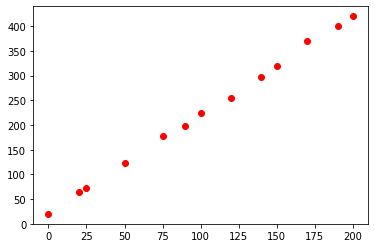

In [24]:
# Criando os dados

import pandas as pd

data = {   
         'age_months' : [0,  20, 25, 50,  75,  90,  100, 120, 140, 150, 170, 190, 200],    
         'height_cm'  : [20, 65, 72, 124, 178, 198, 224, 255, 298, 320, 370, 401, 420] 
        }

df_age_vs_height = pd.DataFrame(data)
print( df_age_vs_height.head() )

# df_age_vs_height.plot(x = 'age_months', y = 'height_cm')
plt.scatter(x = 'age_months', y = 'height_cm', data = df_age_vs_height, color = 'red')

In [25]:
import statsmodels.formula.api as smf

# Criando o objeto do modelo de regressão
estimate = smf.ols( formula = 'height_cm ~ age_months', data = df_age_vs_height ) # caso quisessemos reg. múltipla -> ex. 'height_cm ~ age_months + weight_kg + ...'
# ols = ordinary least squares
# height_cm = dependent variable
# age_months = explanatory variable

# Train
regressao = estimate.fit() # A função fit() faz o treinamento, expondo os algoritmo aos dados

print( regressao.summary() )

                            OLS Regression Results                            
Dep. Variable:              height_cm   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.105e+04
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           7.21e-18
Time:                        03:11:09   Log-Likelihood:                -36.475
No. Observations:                  13   AIC:                             76.95
Df Residuals:                      11   BIC:                             78.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.6566      2.284      9.919      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


Obs: repare no warning que diz que o teste de kurtosis somente será válido em uma amostra de dados maior que 20.

Calculando os termos 'a' e 'b' da regressão de forma prática em Python:

In [29]:
import numpy  as np
import pandas as pd

# Dataframe
data = {   
         'age_months' : [0,  20, 25, 50,  75,  90,  100, 120, 140, 150, 170, 190, 200],    
         'height_cm'  : [20, 65, 72, 124, 178, 198, 224, 255, 298, 320, 370, 401, 420] 
        }

df_age_vs_height = pd.DataFrame(data)

# Definindo variáveis x e y
X = df_age_vs_height['age_months'].values
y = df_age_vs_height['height_cm'].values

# Média de x e y
mean_X = np.mean(X)
mean_y = np.mean(y)

# Usando a fórmula para calcular a e b
numerator = 0
denominator = 0

for i in range(len(X)):
    numerator += (X[i] - mean_X) * (y[i] - mean_y)
    denominator += (X[i] - mean_X) ** 2

b = numerator / denominator
a = mean_y - (b * mean_X)

# Imprimindo os coeficientes
print(f"Valor de 'a':{a:.2f}\nValor de 'b':{b:.2f}")

Valor de 'a':22.66
Valor de 'b':1.99
